In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set visualization to appear inline
%matplotlib inline

In [2]:
# Define the file path
file_path = '../data/cps_raw_v1.csv'

# Load the CSV into a DataFrame
df = pd.read_csv(file_path)

In [3]:
# Filter out instances where AGE_1 < 15
rows_before = len(df)
df = df[df['AGE_1'] >= 15]
removed = rows_before - len(df)
percentage = (removed / rows_before) * 100
print(f"Removed {removed} instances ({percentage:.2f}%) based on AGE_1 < 15")

# Filter out instances where INCTOT_1 or INCTOT_2 == 999999999
rows_before = len(df)
df = df[(df['INCTOT_1'] != 999999999) & (df['INCTOT_2'] != 999999999)]
removed = rows_before - len(df)
percentage = (removed / rows_before) * 100
print(f"Removed {removed} instances ({percentage:.2f}%) based on INCTOT_1 or INCTOT_2 == 999999999")

# Filter out instances where EMPSTAT_1 or EMPSTAT_2 == 0
rows_before = len(df)
df = df[(df['EMPSTAT_1'] != 0) & (df['EMPSTAT_2'] != 0)]
removed = rows_before - len(df)
percentage = (removed / rows_before) * 100
print(f"Removed {removed} instances ({percentage:.2f}%) based on EMPSTAT_1 or EMPSTAT_2 == 0")

# Filter out instances where EMPSTAT_1 or EMPSTAT_2 == 0
rows_before = len(df)
df = df[(df['LABFORCE_1'] != 0) & (df['LABFORCE_2'] != 0)]
removed = rows_before - len(df)
percentage = (removed / rows_before) * 100
print(f"Removed {removed} instances ({percentage:.2f}%) based on LABFORCE_1 or LABFORCE_2 == 0")

# Filter out instances where WORKLY_1 or WORKLY_2 == 0
rows_before = len(df)
df = df[(df['WORKLY_1'] != 0) & (df['WORKLY_2'] != 0)]
removed = rows_before - len(df)
percentage = (removed / rows_before) * 100
print(f"Removed {removed} instances ({percentage:.2f}%) based on WORKLY_1 or WORKLY_2 == 0")

Removed 115301 instances (18.48%) based on AGE_1 < 15
Removed 766 instances (0.15%) based on INCTOT_1 or INCTOT_2 == 999999999
Removed 0 instances (0.00%) based on EMPSTAT_1 or EMPSTAT_2 == 0
Removed 1834 instances (0.36%) based on LABFORCE_1 or LABFORCE_2 == 0
Removed 0 instances (0.00%) based on WORKLY_1 or WORKLY_2 == 0


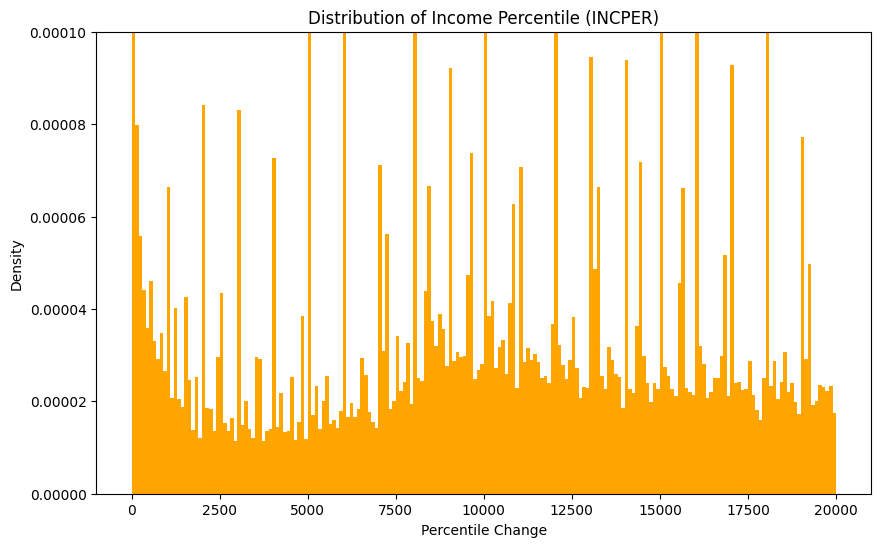

In [ ]:
df_test = df[(df['INCTOT_1']< 20000) & (df['INCTOT_1'] > -1)]
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_test['INCTOT_1'], bins=100, density=True, color='orange')
plt.title('Distribution of Income Percentile (INCPER)')
plt.xlabel('Percentile Change')
plt.ylabel('Density')
# plt.xlim(right = 20000, left = -1)
plt.ylim(top = 0.0001)
plt.show()

In [5]:
# Dictionary of features and their no-data values
no_data_dict = {
    'RELATE': '9900;9999',
    'SEX': '9',
    'RACE': '999',
    'MARST': '9',
    'ASIAN': '99',
    'VETSTAT': '0;9',
    'FAMSIZE': '0',
    'ELDCH': '99',
    'YNGCH': '99',
    'FTYPE': '9',
    'FAMREL': '9',
    'BPL': '99999;96000',
    'YRIMMIG': '0',
    'CITIZEN': '9',
    'NATIVITY': '0',
    'HISPAN': '901;902',
    'EMPSTAT': '0',
    'LABFORCE': '0',
    'CLASSWKR': '0;99',
    'UHRSWORKT': '997;999',
    'UHRSWORK1': '997;999',
    'DURUNEMP': '999',
    'WHYUNEMP': '0',
    'WHYABSNT': '0',
    'WNFTLOOK': '0',
    'WKSTAT': '99',
    'EDUC': '0;1;999',
    'SCHLCOLL': '0',
    'DIFFHEAR': '0',
    'DIFFEYE': '0',
    'DIFFREM': '0',
    'DIFFPHYS': '0',
    'DIFFMOB': '0',
    'DIFFCARE': '0',
    'DIFFANY': '0',
    'CLASSWLY': '0;99',
    'WORKLY': '0',
    'UHRSWORKLY': '999',
    'WKSUNEM1': '99',
    'FULLPART': '0;9',
    'WKXPNS': '9999',
    'NWLOOKWK': '99',
    'PENSION': '0',
    'FIRMSIZE': '0',
    'WANTJOB': '0;9',
    'NUMEMPS': '0',
    'WNLWNILF': '0',
    'FTOTVAL': '9999999999',
    'INCTOT': '999999999',
    'INCWAGE': '99999999',
    'INCBUS': '99999999',
    'INCFARM': '99999999',
    'INCSS': '999999',
    'INCWELFR': '999999',
    'INCRETIR': '99999999',
    'INCSSI': '999999',
    'INCINT': '9999999',
    'INCUNEMP': '999999',
    'INCWKCOM': '999999',
    'INCVET': '9999999',
    'INCSURV': '9999999',
    'INCDISAB': '9999999',
    'INCDIVID': '9999999',
    'INCRENT': '9999999',
    'INCEDUC': '999999',
    'INCCHILD': '999999',
    'INCASIST': '9999999',
    'INCOTHER': '9999999',
    'ADJGINC': '99999999',
    'TAXINC': '9999999',
    'MIGRATE1': '0;9',
    'DISABWRK': '0',
    'QUITSICK': '0',
    'HOURWAGE': '999.99',
    'PAIDHOUR': '0;6;7',
    'UNION': '0',
    'EARNWEEK': '9999.99'
}

# Convert designated no-data values to np.nan for both _1 and _2 suffixed columns
for base_col, invalid_vals in no_data_dict.items():
    # Parse the invalid values string into a list with numeric conversion when possible
    replacements = []
    for val in invalid_vals.split(';'):
        try:
            num = float(val)
            if num.is_integer():
                num = int(num)
            replacements.append(num)
        except ValueError:
            replacements.append(val)
    
    # For both suffixed columns, replace the specified codes with np.nan
    for suffix in ['_1', '_2']:
        col_name = base_col + suffix
        if col_name in df.columns:
            df[col_name] = df[col_name].replace(replacements, np.nan)

In [6]:
df['INCZERO_ONE'] = np.where(df['INCTOT_1'] <= 10, 1, 0)
df['INCZERO_TWO'] = np.where(df['INCTOT_2'] <= 10, 1, 0)

C:\Users\nickb\AppData\Local\Temp\ipykernel_29524\2122607085.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['INCZERO_ONE'] = np.where(df['INCTOT_1'] <= 10, 1, 0)
C:\Users\nickb\AppData\Local\Temp\ipykernel_29524\2122607085.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['INCZERO_TWO'] = np.where(df['INCTOT_2'] <= 10, 1, 0)


In [7]:
# Load percentiles_df and precompute a lookup dictionary by YEAR
percentiles_df = pd.read_csv("../data/usa_percentiles.csv")

# Create a lookup mapping for each year: year -> (inctot_array, percentile_array)
percentiles_lookup = {}
for year, group in percentiles_df.groupby('YEAR'):
    # The group is already sorted by INCTOT_value.
    percentiles_lookup[year] = (group['INCTOT_value'].values, group['Percentile'].values)

def get_percentile_binary(row, year_col, inc_col):
    year = row[year_col]
    inc_value = row[inc_col]
    if year not in percentiles_lookup:
        return np.nan
    inc_array, perc_array = percentiles_lookup[year]
    # Find the insertion index using binary search
    idx = np.searchsorted(inc_array, inc_value)
    # Handle boundary conditions
    if idx == 0:
        return perc_array[0]
    if idx == len(inc_array):
        return perc_array[-1]
    # Compare neighbors to choose the closest match
    diff_low = abs(inc_value - inc_array[idx - 1])
    diff_high = abs(inc_array[idx] - inc_value)
    return perc_array[idx - 1] if diff_low <= diff_high else perc_array[idx]

# Use the binary search lookup to compute the new percentile columns
df['INCPER_1'] = df.apply(
    lambda r: 0 if r['INCZERO_ONE'] == 1 else get_percentile_binary(r, 'YEAR_1', 'INCTOT_1'),
    axis=1
)
df['INCPER_2'] = df.apply(
    lambda r: 0 if r['INCZERO_TWO'] == 1 else get_percentile_binary(r, 'YEAR_2', 'INCTOT_2'),
    axis=1
)

C:\Users\nickb\AppData\Local\Temp\ipykernel_29524\3172532320.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['INCPER_1'] = df.apply(
C:\Users\nickb\AppData\Local\Temp\ipykernel_29524\3172532320.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['INCPER_2'] = df.apply(


In [8]:
df['INCPER_DELTA'] = df['INCPER_2'] - df['INCPER_1']

C:\Users\nickb\AppData\Local\Temp\ipykernel_29524\4242821169.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['INCPER_DELTA'] = df['INCPER_2'] - df['INCPER_1']


In [9]:
df.loc[df['INCPER_1'] < 0.0107, 'INCZERO_ONE'] = 1
df.loc[df['INCPER_2'] < 0.0107, 'INCZERO_TWO'] = 1

In [10]:
# Define the adjustment factors by YEAR (CPI)
adjustment_factors = {
    2009: 1.42,
    2010: 1.397,
    2011: 1.355,
    2012: 1.327,
    2013: 1.308,
    2014: 1.287,
    2015: 1.286,
    2016: 1.27,
    2017: 1.243,
    2018: 1.213,
    2019: 1.192,
    2020: 1.177,
    2021: 1.124,
    2022: 1.041,
    2023: 1
}

# Generate adjustment factors Series for YEAR_1 and YEAR_2
adjustment_series_1 = df["YEAR_1"].map(adjustment_factors)
adjustment_series_2 = df["YEAR_2"].map(adjustment_factors)

# Define the set of columns to exempt from adjustment.
exempt_inc = {"INCPER_1", "INCPER_2", "INCPER_DELTA", "INCZERO_ONE", "INCZERO_TWO"}

# Loop through columns in df and apply adjustment based on the suffix.
for col in df.columns:
    if col in exempt_inc:
        continue
    if "INC" in col and pd.api.types.is_numeric_dtype(df[col]):
        if col.endswith('_1'):
            df[col] = df[col] * adjustment_series_1
        elif col.endswith('_2'):
            df[col] = df[col] * adjustment_series_2

In [11]:
df['INCLOG_1'] = np.where(df['INCTOT_1'] <= 1, 0.1, np.log10(df['INCTOT_1']))
df['INCLOG_2'] = np.where(df['INCTOT_2'] <= 1, 0.1, np.log10(df['INCTOT_2']))
df['INCLOG_DELTA'] = df['INCLOG_2'] - df['INCLOG_1']

C:\Users\nickb\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\nickb\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\nickb\AppData\Local\Temp\ipykernel_29524\3208778685.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['INCLOG_1'] = np.where(df['INCTOT_1'] <= 1, 0.1, np.log10(df['INCTOT_1']))
C:\Users\nickb\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  resu

In [12]:
# Remove columns ending with '_2'
cols_to_drop = [col for col in df.columns if col.endswith('_2')]
df.drop(columns=cols_to_drop, inplace=True)

# Rename columns ending with '_1' by removing the suffix
df.rename(columns=lambda x: x[:-2] if x.endswith('_1') else x, inplace=True)

In [13]:
# Remove instances where BPL or NATIVITY are missing
df.dropna(subset=["BPL", "NATIVITY", "LABFORCE"], inplace=True)

In [14]:
df.drop(columns=["ASIAN", "DURUNEMP", "WHYUNEMP", "WHYABSNT", "WNFTLOOK", 
                 "WKSUNEM1", "WNLWNILF", "INCRETIR", 
                 "HOURWAGE", "PAIDHOUR", "UNION", "EARNWEEK", "POPSTAT"], inplace=True, errors='ignore')

In [15]:
# Split based on occupational presence
df_work = df[df["LABFORCE"] == 2]
df_0 = df[df["LABFORCE"] == 1]

In [16]:
# Fill missing values with the mode for specified categorical columns
mode_cols = ["VETSTAT", "WKSTAT", "CLASSWLY", "FULLPART", "PENSION"]
for col in mode_cols:
    if col in df_work.columns:
        mode_val = df_work[col].mode(dropna=True)
        if not mode_val.empty:
            df_work[col] = df_work[col].fillna(mode_val.iloc[0])

# Fill missing values with the median for specified numerical columns
median_cols = ["UHRSWORKT", "UHRSWORK1", "UHRSWORKLY", "FIRMSIZE", "NUMEMPS"]
for col in median_cols:
    if col in df_work.columns:
        median_val = df_work[col].median()
        df_work[col] = df_work[col].fillna(median_val)

df_work["WKXPNS"] = df_work["WKXPNS"].fillna(0)

# Fill missing SCHLCOLL values by mapping the modal value for that row's AGE
age_mode = df_work.groupby("AGE")["SCHLCOLL"].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
df_work["SCHLCOLL"] = df_work.apply(lambda row: age_mode[row["AGE"]] if pd.isna(row["SCHLCOLL"]) else row["SCHLCOLL"], axis=1)
df_work.loc[(df_work["AGE"] > 50) & (df_work["SCHLCOLL"].isna()), "SCHLCOLL"] = 5
df_work.loc[(df_work["AGE"] == 15) & (df_work["SCHLCOLL"].isna()), "SCHLCOLL"] = 2

C:\Users\nickb\AppData\Local\Temp\ipykernel_29524\1546325291.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_work[col] = df_work[col].fillna(mode_val.iloc[0])
C:\Users\nickb\AppData\Local\Temp\ipykernel_29524\1546325291.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_work[col] = df_work[col].fillna(median_val)
C:\Users\nickb\AppData\Local\Temp\ipykernel_29524\1546325291.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [17]:
# Fill missing values with the mode for specified categorical columns
mode_cols = ["VETSTAT", "PENSION", "DIFFHEAR", "DIFFHEAR", "DIFFEYE", "DIFFREM", "DIFFPHYS", "DIFFMOB", "DIFFCARE", "DIFFANY", "NWLOOKWK", "WANTJOB"]
for col in mode_cols:
    if col in df_0.columns:
        mode_val = df_0[col].mode(dropna=True)
        if not mode_val.empty:
            df_0[col] = df_0[col].fillna(mode_val.iloc[0])

# Fill missing values with the median for specified numerical columns
median_cols = ["UHRSWORKLY", "FIRMSIZE", "NUMEMPS"]
for col in median_cols:
    if col in df_0.columns:
        median_val = df_0[col].median()
        df_0[col] = df_0[col].fillna(median_val)

# Fill missing SCHLCOLL values by mapping the modal value for that row's AGE
age_mode = df_0.groupby("AGE")["SCHLCOLL"].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
df_0["SCHLCOLL"] = df_0.apply(lambda row: age_mode[row["AGE"]] if pd.isna(row["SCHLCOLL"]) else row["SCHLCOLL"], axis=1)
df_0.loc[(df_0["AGE"] > 50) & (df_0["SCHLCOLL"].isna()), "SCHLCOLL"] = 5
df_0.loc[(df_0["AGE"] == 15) & (df_0["SCHLCOLL"].isna()), "SCHLCOLL"] = 2

C:\Users\nickb\AppData\Local\Temp\ipykernel_29524\2593325679.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0[col] = df_0[col].fillna(mode_val.iloc[0])
C:\Users\nickb\AppData\Local\Temp\ipykernel_29524\2593325679.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0[col] = df_0[col].fillna(mode_val.iloc[0])
C:\Users\nickb\AppData\Local\Temp\ipykernel_29524\2593325679.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [18]:
df = pd.concat([df_work, df_0], ignore_index=True)

In [ ]:
save_exceptions = {"SERIAL", "MONTH", "CPSID", "ASECFLAG", 
               "ASECWTH", "PERNUM", "CPSIDP", "CPSIDV", "ASECWT"}

# Create a new DataFrame with columns not in exceptions
df_to_save = df[[col for col in df.columns if col not in save_exceptions]]

# Save the DataFrame to a CSV file
df_to_save.to_csv("../data/cps_clean_v4.csv", index=False)

In [20]:
print(df.head())

   YEAR  SERIAL  MONTH           CPSID  ASECFLAG  ASECWTH  PERNUM  \
0  2009   62697      3  20081200264100         1  1672.56       1   
1  2009   62783      3  20081200266000         1  3522.03       3   
2  2009   63309      3  20081200268000         1  1646.35       1   
3  2009   63309      3  20081200268000         1  1646.35       2   
4  2009   63362      3  20081200270900         1  1293.41       1   

           CPSIDP           CPSIDV   ASECWT  ...  MIGRATE1  DISABWRK  HEALTH  \
0  20081200264101  200812002641011  1672.56  ...         1         1       2   
1  20081200266002  200812002660021  3200.17  ...         1         1       1   
2  20081200268001  200812002680012  1646.35  ...         1         1       3   
3  20081200268002  200812002680021  1646.35  ...         1         2       3   
4  20081200270901  200812002709011  1293.41  ...         1         1       1   

   QUITSICK  INCZERO_ONE  INCZERO_TWO   INCPER  INCPER_DELTA    INCLOG  \
0         1            0      

In [21]:
# Get basic information about the DataFrame
print("\nDataFrame Information:")
print(df.info())

# Generate descriptive statistics for numerical columns
print("\nDescriptive Statistics (Numerical Columns):")
print(df.describe())


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505621 entries, 0 to 505620
Data columns (total 93 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   YEAR          505621 non-null  int64  
 1   SERIAL        505621 non-null  int64  
 2   MONTH         505621 non-null  int64  
 3   CPSID         505621 non-null  int64  
 4   ASECFLAG      505621 non-null  int64  
 5   ASECWTH       505621 non-null  float64
 6   PERNUM        505621 non-null  int64  
 7   CPSIDP        505621 non-null  int64  
 8   CPSIDV        505621 non-null  int64  
 9   ASECWT        505621 non-null  float64
 10  RELATE        505621 non-null  int64  
 11  AGE           505621 non-null  int64  
 12  SEX           505621 non-null  int64  
 13  RACE          505621 non-null  int64  
 14  MARST         505621 non-null  int64  
 15  VETSTAT       505621 non-null  float64
 16  FAMSIZE       505621 non-null  int64  
 17  NCHILD        505621 non

In [22]:
df.shape[0]

505621

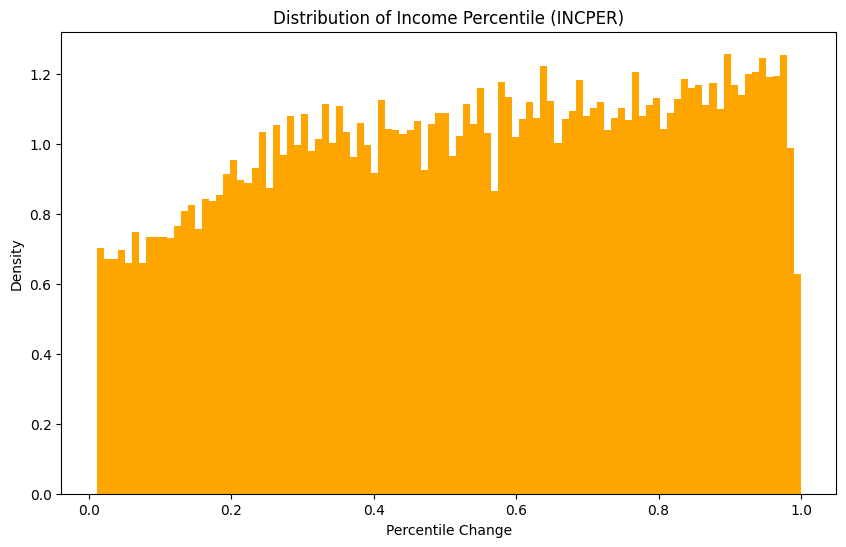

In [23]:
df_inc = df[(df['INCZERO_ONE'] == 0)]
# df_inc = df

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_inc['INCPER'], bins=100, density=True, color='orange')
plt.title('Distribution of Income Percentile (INCPER)')
plt.xlabel('Percentile Change')
plt.ylabel('Density')
plt.show()

Fitted parameters: beta=0.37, loc=-0.00, scale=0.01


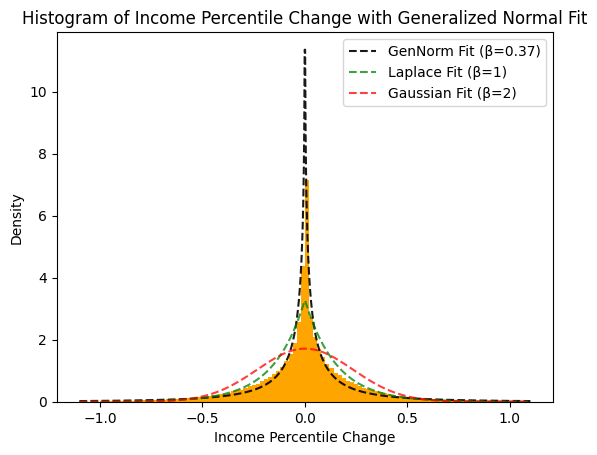

In [24]:
from scipy.stats import gennorm, norm, laplace

# Prepare the data by dropping NaN values
data = df['INCPER_DELTA'].dropna()

# Plot histogram of INCPER_DELTA with 100 bins as a density function
plt.hist(data, bins=100, density=True, color='orange')

# Fit a Generalized Normal Distribution to the data
params = gennorm.fit(data)
loc_n, scale_n  = norm.fit(data)
loc_l, scale_l = laplace.fit(data)

# Extract the shape, location, and scale parameters
beta, loc, scale = params
print(f"Fitted parameters: beta={beta:.2f}, loc={loc:.2f}, scale={scale:.2f}")

# Generate x values for plotting the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)

# Calculate the PDF using the fitted parameters
p = gennorm.pdf(x, beta, loc=loc, scale=scale)
p_norm = norm.pdf(x, loc=loc_n, scale=scale_n)
p_laplace = laplace.pdf(x, loc=loc_l, scale=scale_l)

# Plot the fitted Generalized Normal PDF on the histogram
plt.plot(x, p, 'k', linewidth=1.5, linestyle='dashed', label=f'GenNorm Fit (β={beta:.2f})', alpha=0.9)
plt.plot(x, p_laplace, 'g', linewidth=1.5, linestyle='dashed', label=f'Laplace Fit (β=1)', alpha=0.75)
plt.plot(x, p_norm, 'r', linewidth=1.5, linestyle='dashed', label=f'Gaussian Fit (β=2)', alpha=0.75)
plt.title('Histogram of Income Percentile Change with Generalized Normal Fit')
plt.xlabel('Income Percentile Change')
plt.ylabel('Density')
plt.legend()
plt.show()

In [25]:
# Define the list of fields to filter
fields_to_filter = [
    'RELATE', 'RACE', 'MARST', 'POPSTAT', 'ASIAN', 'FTYPE', 'FAMKIND',
    'FAMREL', 'BPL', 'CITIZEN', 'NATIVITY', 'HISPAN', 'EMPSTAT', 'OCC',
    'IND', 'CLASSWKR', 'WHYUNEMP', 'WHYABSNT', 'WNFTLOOK', 'WKSTAT',
    'SCHLCOLL', 'OCCLY', 'INDLY', 'CLASSWLY', 'FULLPART', 'PENSION',
    'WANTJOB', 'WNLWNILF', 'MIGRATE1', 'UNION', 'REGION', 'STATEFIP',
    'STATECENSUS', 'COUNTY', 'METFIPS', 'METAREA', 'METRO', 'CBSASZ',
    'SEX', 'VETSTAT', 'LABFORCE', 'DIFFHEAR', 'DIFFEYE', 'DIFFREM',
    'DIFFPHYS', 'DIFFMOB', 'DIFFCARE', 'DIFFANY', 'WORKLY',
    'DISABWRK', 'QUITSICK', 'PAIDHOUR'
]

# Filter the sorted cardinality by the specified fields
filtered_cardinality = [ (feat, cnt) for feat, cnt in sorted_cardinality if feat in fields_to_filter ]

# Sum the counts
total_count = sum(cnt for feat, cnt in filtered_cardinality)

# Print the filtered cardinality
for feature, count in filtered_cardinality:
    print(f"{feature}: {count} unique values")

# Print the total count
print(f"Total unique values for selected fields: {total_count}")


NameError: name 'sorted_cardinality' is not defined